In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization, Flatten,Conv2D, Dropout, Dense, GlobalAveragePooling2D
import tensorflow as tf
import keras
from numpy import expand_dims
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [2]:
path = '../input/lego-minifigures-classification/'

In [3]:
pic=cv2.imread('../input/lego-minifigures-classification/marvel/0007/002.jpg')

In [4]:
pic.shape

(512, 512, 3)

In [5]:
opened_dir = os.listdir(path)
print(opened_dir)

['metadata.csv', 'harry-potter', 'LICENSE', 'index.csv', 'star-wars', 'marvel']


Opening csv files

In [6]:
index = pd.read_csv(path + 'index.csv')

In [7]:
index.tail()

Unnamed: 0                 path  class_id train-valid
235         235  marvel/0010/010.jpg        22       train
236         236  marvel/0010/011.jpg        22       valid
237         237  marvel/0010/012.jpg        22       valid
238         238  marvel/0010/013.jpg        22       train
239         239  marvel/0010/014.jpg        22       train

In [8]:
index.columns

Index(['Unnamed: 0', 'path', 'class_id', 'train-valid'], dtype='object')

In [9]:
index.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
metadata = pd.read_csv(path+'metadata.csv')

In [11]:
index['name']=None

In [12]:
index.head()

path  class_id train-valid  name
0  marvel/0001/001.jpg         1       train  None
1  marvel/0001/002.jpg         1       valid  None
2  marvel/0001/003.jpg         1       train  None
3  marvel/0001/004.jpg         1       train  None
4  marvel/0001/005.jpg         1       train  None

In [13]:
metadata.head()

Unnamed: 0  class_id lego_ids                 lego_names minifigure_name
0           0         1  [76115]  ['Spider Mech vs. Venom']      SPIDER-MAN
1           1         2  [76115]  ['Spider Mech vs. Venom']           VENOM
2           2         3  [76115]  ['Spider Mech vs. Venom']        AUNT MAY
3           3         4  [76115]  ['Spider Mech vs. Venom']    GHOST SPIDER
4           4         5  [75208]             ["Yoda's Hut"]            YODA

In [14]:
for i, name in zip(metadata['class_id'],metadata['minifigure_name']):
    for sor, j in enumerate(index['class_id']):
        if i==j:
            index.iat[sor, 3]=name
        

In [15]:
index.tail(10)

path  class_id train-valid        name
230  marvel/0010/005.jpg        22       valid  TASKMASTER
231  marvel/0010/006.jpg        22       train  TASKMASTER
232  marvel/0010/007.jpg        22       valid  TASKMASTER
233  marvel/0010/008.jpg        22       valid  TASKMASTER
234  marvel/0010/009.jpg        22       valid  TASKMASTER
235  marvel/0010/010.jpg        22       train  TASKMASTER
236  marvel/0010/011.jpg        22       valid  TASKMASTER
237  marvel/0010/012.jpg        22       valid  TASKMASTER
238  marvel/0010/013.jpg        22       train  TASKMASTER
239  marvel/0010/014.jpg        22       train  TASKMASTER

In [16]:
valid = index.copy()

In [17]:
filt = index['train-valid']=='train'
index.where(filt, inplace=True)
filt1 = valid['train-valid']=='valid'
valid.where(filt1, inplace=True)

In [18]:
index.dropna(inplace=True, axis=0)
valid.dropna(inplace=True, axis=0)

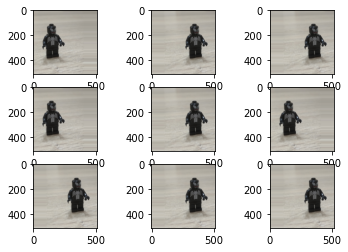

In [19]:
img = load_img('../input/lego-minifigures-classification/marvel/0002/003.jpg')

data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-100,100])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

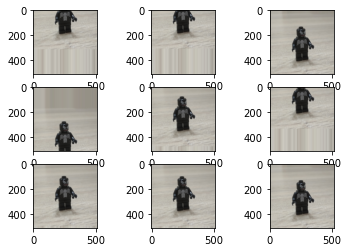

In [20]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.4)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

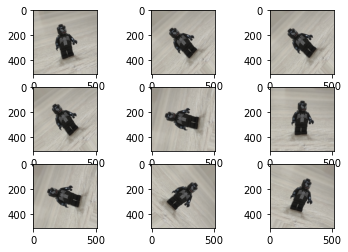

In [21]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=90)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

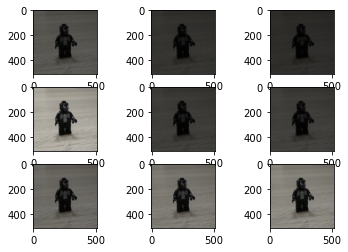

In [22]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

In [23]:
batch= 15
size= 256
nb_classes=21
IN_SHAPE=(size,size,3)
Epoch= 100

In [24]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=90, width_shift_range=0.4, 
                                   height_shift_range=0.4,fill_mode="nearest", zoom_range=0.4, vertical_flip=True, horizontal_flip=True, brightness_range=[0.2,1.0])
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [25]:
train_generator = train_datagen.flow_from_dataframe(dataframe=index, directory=path,
                                                   x_col='path', y_col='name', batch_size= batch,
                                                   shuffle=True, target_size=(size,size))
valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid, directory=path,
                                                   x_col='path', y_col='name', batch_size= batch,
                                                   shuffle=False, target_size=(size,size))

Found 126 validated image filenames belonging to 21 classes.
Found 114 validated image filenames belonging to 21 classes.


# Efficient Net

In [26]:
!pip install efficientnet
import efficientnet.tfkeras as efn

     |████████████████████████████████| 50 kB 645 kB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [27]:
def get_model1():    
    base_model =  efn.EfficientNetB3(input_shape=IN_SHAPE, weights='imagenet', include_top=False, pooling='avg')
    x = base_model.output
    #x = Dense(500,activation='relu')(x)
    #x = Dropout(0.5)(x)
    #x = Dense(150,activation='relu')(x)
    #x = Dropout(0.2)(x)
    predictions = Dense(nb_classes, activation="softmax")(x)
    return Model(inputs=base_model.input, outputs=predictions)

In [28]:
model1 = get_model1()
    
model1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics= 'accuracy')

44113920/44107200 [==============================] - 1s 0us/step


In [29]:
history = model1.fit_generator(train_generator, epochs=Epoch, validation_data=valid_generator)

Epoch 1/100
9/9 [==============================] - 7s 824ms/step - loss: 3.1234 - accuracy: 0.0476 - val_loss: 3.1579 - val_accuracy: 0.0088
Epoch 2/100
9/9 [==============================] - 5s 568ms/step - loss: 3.0311 - accuracy: 0.0397 - val_loss: 3.1039 - val_accuracy: 0.0263
Epoch 3/100
9/9 [==============================] - 5s 504ms/step - loss: 2.9719 - accuracy: 0.1190 - val_loss: 3.0636 - val_accuracy: 0.0614
Epoch 4/100
9/9 [==============================] - 4s 472ms/step - loss: 2.9259 - accuracy: 0.1349 - val_loss: 3.0226 - val_accuracy: 0.0877
Epoch 5/100
9/9 [==============================] - 4s 457ms/step - loss: 2.8906 - accuracy: 0.1032 - val_loss: 2.9937 - val_accuracy: 0.0877
Epoch 6/100
9/9 [==============================] - 4s 496ms/step - loss: 2.8145 - accuracy: 0.1905 - val_loss: 2.9652 - val_accuracy: 0.0965
Epoch 7/100
9/9 [==============================] - 4s 480ms/step - loss: 2.7459 - accuracy: 0.2381 - val_loss: 2.9072 - val_accuracy: 0.1140
Epoch 8/100
9

Epoch 59/100
9/9 [==============================] - 5s 514ms/step - loss: 0.3197 - accuracy: 0.9603 - val_loss: 0.4476 - val_accuracy: 0.9474
Epoch 60/100
9/9 [==============================] - 5s 521ms/step - loss: 0.2612 - accuracy: 1.0000 - val_loss: 0.4548 - val_accuracy: 0.9474
Epoch 61/100
9/9 [==============================] - 4s 458ms/step - loss: 0.3428 - accuracy: 0.9444 - val_loss: 0.4933 - val_accuracy: 0.9211
Epoch 62/100
9/9 [==============================] - 4s 496ms/step - loss: 0.3347 - accuracy: 0.9524 - val_loss: 0.4843 - val_accuracy: 0.9298
Epoch 63/100
9/9 [==============================] - 5s 540ms/step - loss: 0.2794 - accuracy: 0.9841 - val_loss: 0.4955 - val_accuracy: 0.9298
Epoch 64/100
9/9 [==============================] - 5s 521ms/step - loss: 0.2805 - accuracy: 0.9524 - val_loss: 0.5100 - val_accuracy: 0.9211
Epoch 65/100
9/9 [==============================] - 4s 474ms/step - loss: 0.2687 - accuracy: 0.9762 - val_loss: 0.5157 - val_accuracy: 0.9211
Epoch 

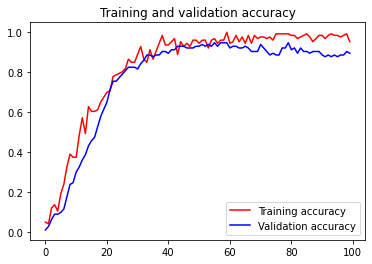

<Figure size 432x288 with 0 Axes>

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

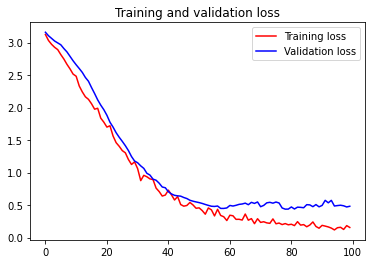

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Testing the model

In [32]:
valid.head()

path  class_id train-valid        name
1  marvel/0001/002.jpg       1.0       valid  SPIDER-MAN
5  marvel/0001/006.jpg       1.0       valid  SPIDER-MAN
7  marvel/0001/008.jpg       1.0       valid  SPIDER-MAN
8  marvel/0001/009.jpg       1.0       valid  SPIDER-MAN
9  marvel/0001/010.jpg       1.0       valid  SPIDER-MAN

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
test, _val = train_test_split(valid, test_size=0.5)

In [39]:
test.head()

path  class_id train-valid              name
204        marvel/0008/007.jpg      20.0       valid       BLACK WIDOW
186  harry-potter/0002/002.jpg      19.0       valid       Ron Weasley
62      star-wars/0003/001.jpg       7.0       valid             R2-D2
101     star-wars/0005/010.jpg       9.0       valid  GENERAL GRIEVOUS
46      star-wars/0001/007.jpg       5.0       valid              YODA

In [47]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_dataframe(dataframe=test, directory=path, x_col='path', y_col='name', batch_size= 1,
                                 shuffle=False, target_size=(size,size))

Found 57 validated image filenames belonging to 21 classes.


In [53]:
model1.evaluate_generator(generator=valid_generator)

[0.48090776801109314, 0.8947368264198303]

In [54]:
test_generator.reset()
pred=model1.predict_generator(test_generator,verbose=1)

57/57 [==============================] - 1s 17ms/step


In [56]:
predicted_classes=np.argmax(pred,axis=1)

In [57]:
predicted_classes

array([ 1, 14, 13,  4, 20,  3,  7, 15, 14,  1, 10, 12, 18,  0, 14,  2,  0,
       19, 12, 11, 13, 17,  5,  1, 17,  8, 16,  7, 15, 15, 19,  4, 16,  4,
        1,  2, 15, 16, 12, 11,  3,  0, 10, 11, 11, 15,  0,  4, 13, 18,  5,
        9,  5, 18, 15, 19, 10])

In [59]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_classes]

In [61]:
labels

{0: 'AUNT MAY',
 1: 'BLACK WIDOW',
 2: 'CARA DUNE',
 3: 'FIREFIGHTER',
 4: 'GENERAL GRIEVOUS',
 5: 'GHOST SPIDER',
 6: 'Harry Potter',
 7: 'KLATOOINIAN RAIDER 1',
 8: 'KLATOOINIAN RAIDER 2',
 9: 'KYLO REN',
 10: 'LUKE SKYWALKER',
 11: 'MACE WINDU',
 12: 'MYSTERIO',
 13: 'R2-D2',
 14: 'Ron Weasley',
 15: 'SPIDER-MAN',
 16: 'TASKMASTER',
 17: 'THE MANDALORIAN',
 18: 'VENOM',
 19: 'YELENA BELOVA',
 20: 'YODA'}

In [60]:
predictions

['BLACK WIDOW',
 'Ron Weasley',
 'R2-D2',
 'GENERAL GRIEVOUS',
 'YODA',
 'FIREFIGHTER',
 'KLATOOINIAN RAIDER 1',
 'SPIDER-MAN',
 'Ron Weasley',
 'BLACK WIDOW',
 'LUKE SKYWALKER',
 'MYSTERIO',
 'VENOM',
 'AUNT MAY',
 'Ron Weasley',
 'CARA DUNE',
 'AUNT MAY',
 'YELENA BELOVA',
 'MYSTERIO',
 'MACE WINDU',
 'R2-D2',
 'THE MANDALORIAN',
 'GHOST SPIDER',
 'BLACK WIDOW',
 'THE MANDALORIAN',
 'KLATOOINIAN RAIDER 2',
 'TASKMASTER',
 'KLATOOINIAN RAIDER 1',
 'SPIDER-MAN',
 'SPIDER-MAN',
 'YELENA BELOVA',
 'GENERAL GRIEVOUS',
 'TASKMASTER',
 'GENERAL GRIEVOUS',
 'BLACK WIDOW',
 'CARA DUNE',
 'SPIDER-MAN',
 'TASKMASTER',
 'MYSTERIO',
 'MACE WINDU',
 'FIREFIGHTER',
 'AUNT MAY',
 'LUKE SKYWALKER',
 'MACE WINDU',
 'MACE WINDU',
 'SPIDER-MAN',
 'AUNT MAY',
 'GENERAL GRIEVOUS',
 'R2-D2',
 'VENOM',
 'GHOST SPIDER',
 'KYLO REN',
 'GHOST SPIDER',
 'VENOM',
 'SPIDER-MAN',
 'YELENA BELOVA',
 'LUKE SKYWALKER']

In [65]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [84]:
results.tail()

Filename     Predictions
52     marvel/0004/002.jpg    GHOST SPIDER
53     marvel/0002/002.jpg           VENOM
54     marvel/0001/008.jpg      SPIDER-MAN
55     marvel/0009/009.jpg   YELENA BELOVA
56  star-wars/0002/001.jpg  LUKE SKYWALKER

BLACK WIDOW


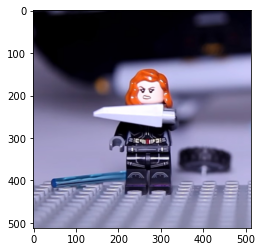

Ron Weasley


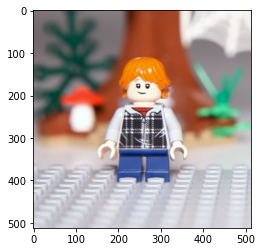

R2-D2


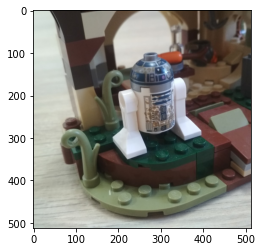

GENERAL GRIEVOUS


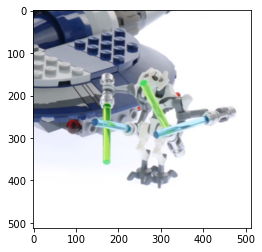

YODA


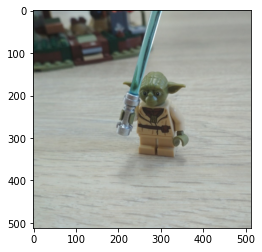

FIREFIGHTER


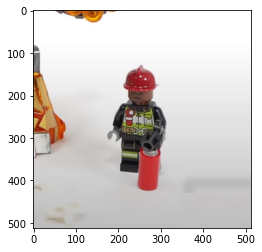

KLATOOINIAN RAIDER 1


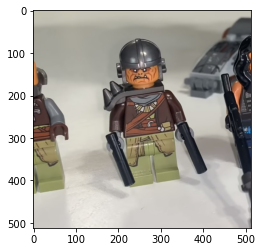

SPIDER-MAN


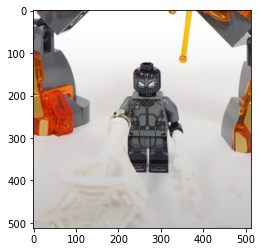

Ron Weasley


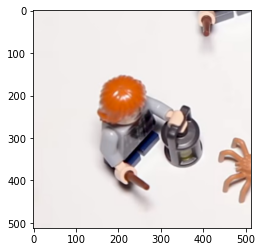

BLACK WIDOW


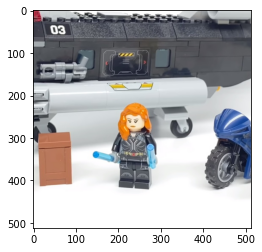

LUKE SKYWALKER


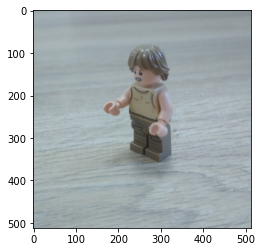

MYSTERIO


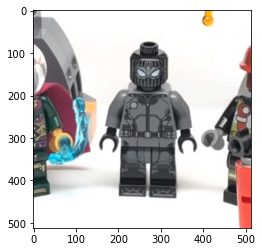

VENOM


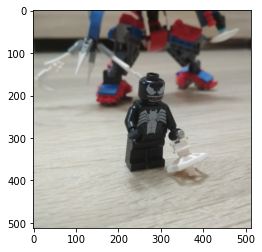

AUNT MAY


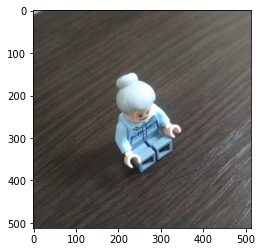

Ron Weasley


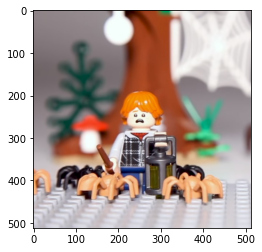

CARA DUNE


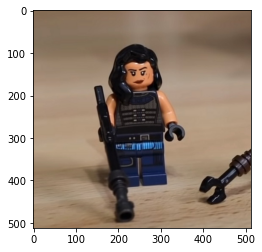

AUNT MAY


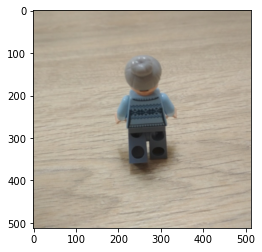

YELENA BELOVA


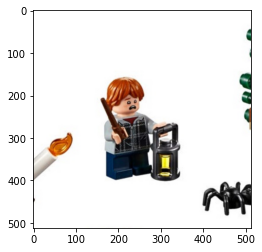

MYSTERIO


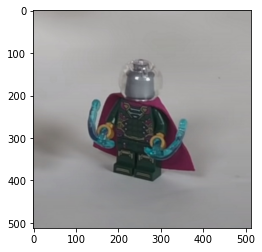

MACE WINDU


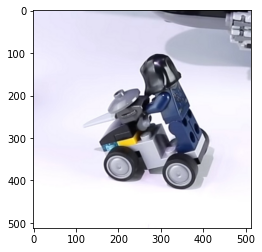

R2-D2


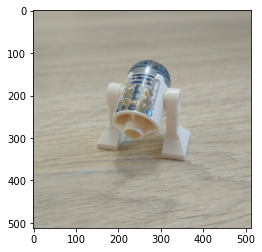

THE MANDALORIAN


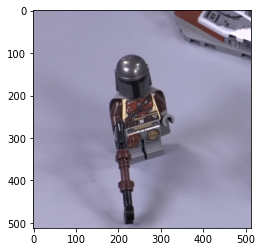

GHOST SPIDER


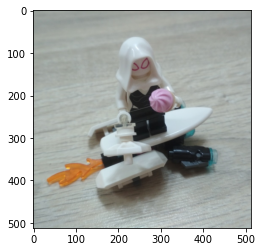

BLACK WIDOW


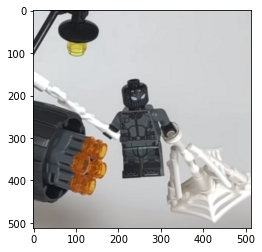

THE MANDALORIAN


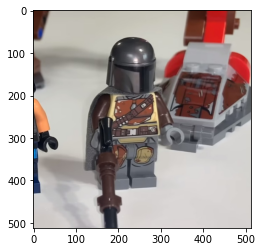

KLATOOINIAN RAIDER 2


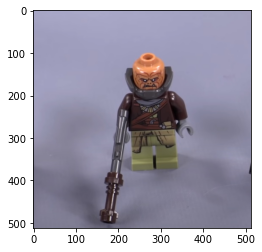

TASKMASTER


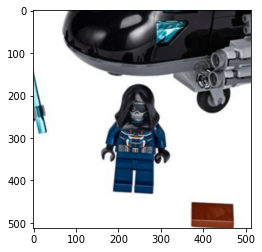

KLATOOINIAN RAIDER 1


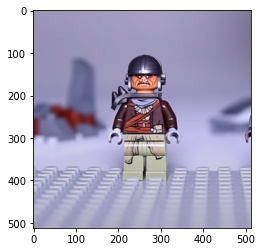

SPIDER-MAN


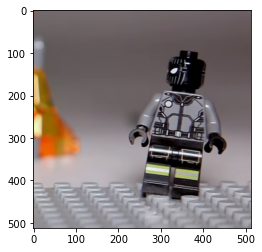

SPIDER-MAN


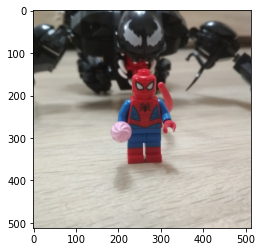

YELENA BELOVA


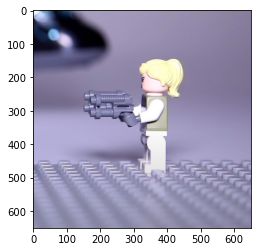

GENERAL GRIEVOUS


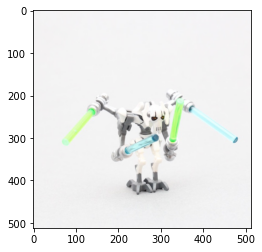

TASKMASTER


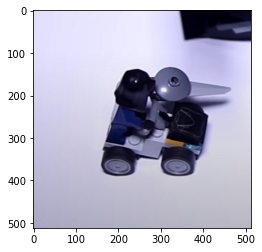

GENERAL GRIEVOUS


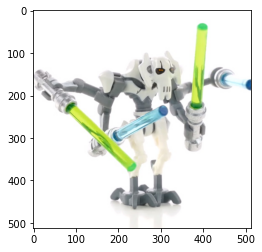

BLACK WIDOW


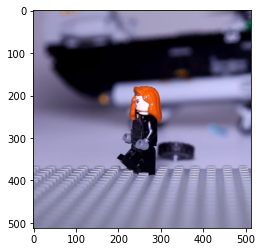

CARA DUNE


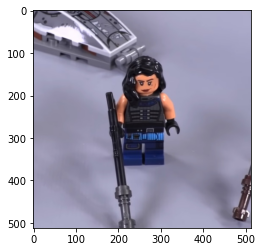

SPIDER-MAN


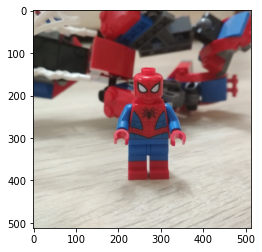

TASKMASTER


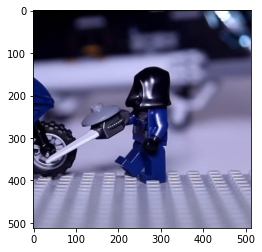

MYSTERIO


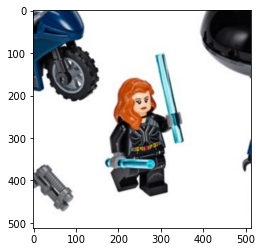

MACE WINDU


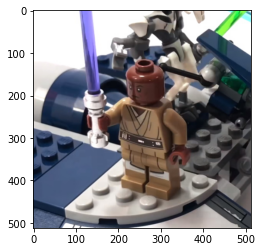

FIREFIGHTER


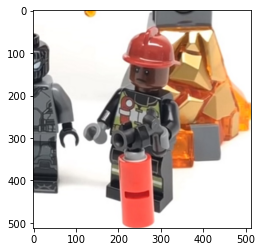

AUNT MAY


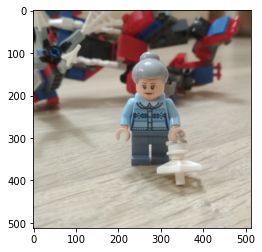

LUKE SKYWALKER


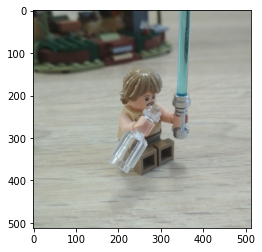

MACE WINDU


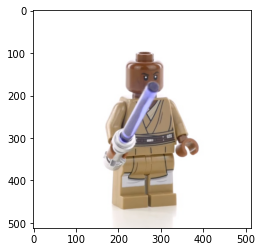

MACE WINDU


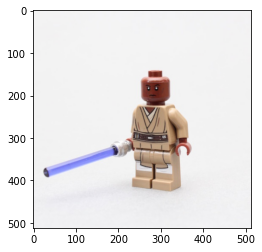

SPIDER-MAN


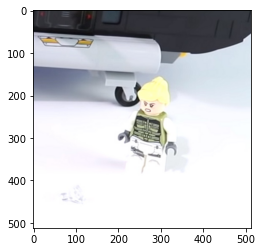

AUNT MAY


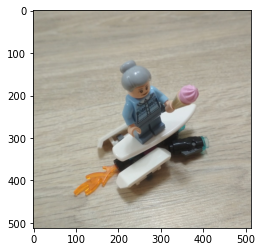

GENERAL GRIEVOUS


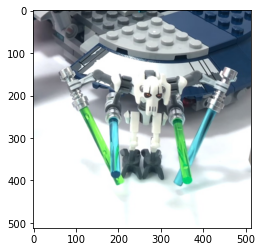

R2-D2


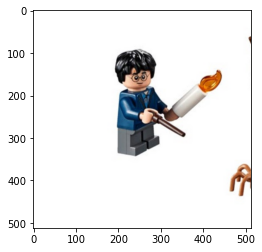

VENOM


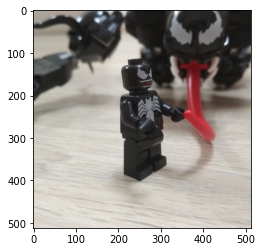

GHOST SPIDER


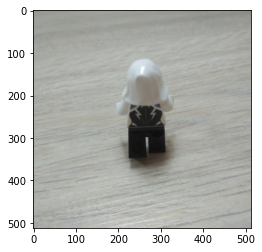

KYLO REN


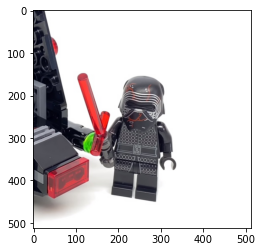

GHOST SPIDER


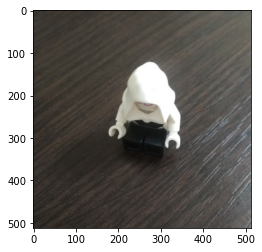

VENOM


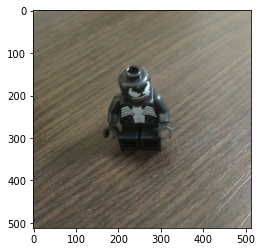

SPIDER-MAN


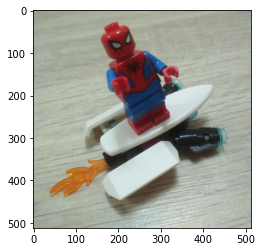

YELENA BELOVA


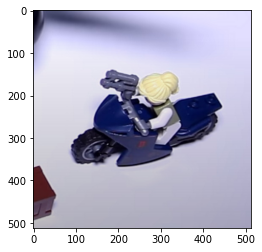

LUKE SKYWALKER


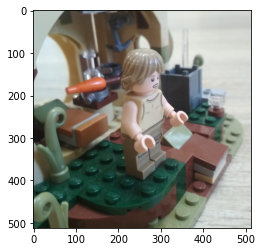

In [101]:
for pic, name in zip(results['Filename'], results['Predictions']): 
    img = load_img(path+pic)
    plt.imshow(img)
    print(name)   
    plt.show()

   